<a href="https://colab.research.google.com/github/Mwaniki25/KNN_-_Naive_Bayes/blob/main/Titanic_Survivor_Prediction_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Case Study of Predicting the number of survivors in the Titanic Accident which happened in 1912.

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Use machine learning to create a model that predicts which passengers survived the Titanic accident.

### b) Defining the Metric for Success
> - Randomly partition each dataset into two parts i.e 80 - 20  sets. 
- Compute the accuracy (percentage of correct classification).
- Report the confusion matrix of each classifier.
- Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
Suggest and apply at least one of the optimization techniques that you learned earlier this week.
- Provide further recommendations to improve both classifiers.

### c) Understanding the context 
> Variable	Definition	Key
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
-  sex	Sex	
-  Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
-  parch	# of parents / children aboard the Titanic	
-  ticket	Ticket number	
- fare	Passenger fare	
-  cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

### d) Recording the Experimental Design
> -  Exploratory Data Analysis
- Data Cleaning
- External Data Source Validation
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Modelling: KNN(K- Nearest Neighbor)
- Follow up Questions

Conclusion

### e) Data Relevance

## 2. Reading the Data

In [1]:
# Importing important libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the Data from the source i.e. csv
# ---
train = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
test = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')



## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
train.shape

(891, 12)

In [4]:
# checking test
test.shape

(418, 11)

In [5]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Previewing the top of test
# 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Checking whether each column has an appropriate datatype
#
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.  [Link](https://www.kaggle.com/c/titanic).

### a.Validation

## 5. Tidying the Dataset

In [8]:

# detect columns with missing values in the training dataset

# isnull().sum() will sum the number of missing values by columns
train_count_of_missval_by_col = (train.isnull().sum())
train_count_of_missval_by_col

# below code will display only the columns with missing values (in absolute number of rows)
train_count_of_missval_by_col[train_count_of_missval_by_col > 0]

# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(train_count_of_missval_by_col[train_count_of_missval_by_col > 0]/train.shape[0])*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [9]:
# detect columns with missing values in the test data
# isnull().sum() will sum the number of missing values by columns
test_count_of_missval_by_col = (test.isnull().sum())
test_count_of_missval_by_col

# below code will display only the columns with missing values (in absolute number of rows)
test_count_of_missval_by_col[test_count_of_missval_by_col > 0]

# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(test_count_of_missval_by_col[test_count_of_missval_by_col > 0]/test.shape[0])*100

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

In [10]:
# Dealing with the Missing Data
#

train.drop(columns=['Cabin'], inplace=True)
train.dropna(subset=['Embarked'], inplace=True)

test.drop(columns=['Cabin'], inplace=True)
test.dropna(subset=['Embarked','Fare'], inplace=True)

In [11]:
# Dealing with missing data in the age column
train["Age"].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)
test["Age"].fillna(test.groupby('Sex')['Age'].transform("median"), inplace=True)

In [12]:
# Dropping irrelevant columns
train.drop(columns=['PassengerId','Ticket'], inplace=True)
test.drop(columns=['PassengerId','Ticket'], inplace=True)

In [13]:
# Converting age into int instead of float

# train
train['Age'] = np.round(train['Age']).astype(int)
# test
test['Age'] = np.round(test['Age']).astype(int)

In [14]:
# Creating  a family size column

train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

In [15]:
# Previewing changes
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,0


In [16]:
train.dtypes

Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
FamilySize      int64
dtype: object

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Name        889 non-null    object 
 3   Sex         889 non-null    object 
 4   Age         889 non-null    int64  
 5   SibSp       889 non-null    int64  
 6   Parch       889 non-null    int64  
 7   Fare        889 non-null    float64
 8   Embarked    889 non-null    object 
 9   FamilySize  889 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 76.4+ KB


## 6. Exploratory Analysis

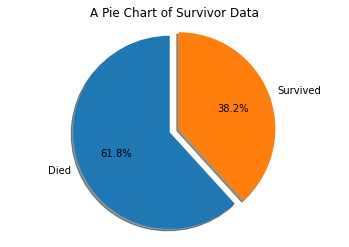

In [18]:
# Ploting the bivariate summaries and recording our observations

#Create a pie chart to indicate the survivors
column= train.Survived.value_counts()


# accessing the data to plot

# labels
label= ['Died','Survived']
# values
value = column.values

# plotting the pie chart
plt.pie(value, labels = label, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of Survivor Data')
plt.show()

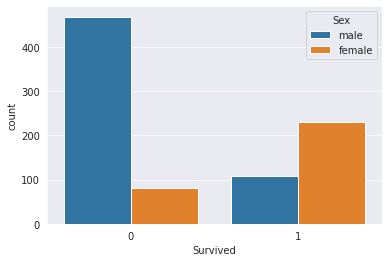

In [19]:
# Comparing survivor data against the sexes
# 

sns.set_style('darkgrid')
sns.countplot(x='Survived', hue='Sex', data=train)
plt.show()

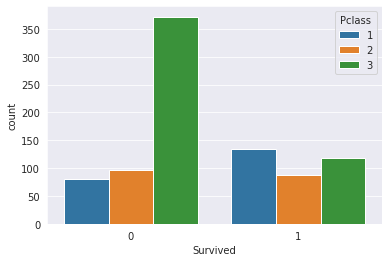

In [20]:
# Comparing survivor data against the classes
# 
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.show()

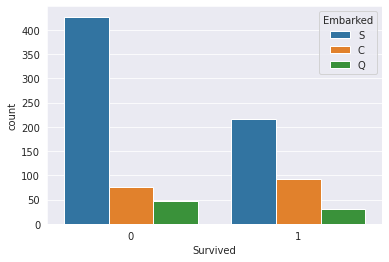

In [21]:

# Comparing survivor data against places embarked from
# 

sns.countplot(x='Survived', hue='Embarked', data=train)
plt.show()

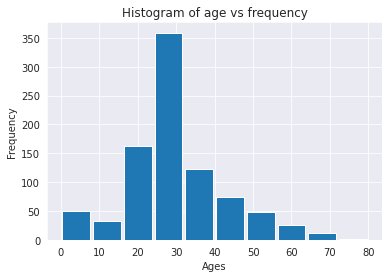

In [22]:

#Plotting a age histogram
ages = train['Age']

plt.hist(ages, histtype='bar', rwidth=0.9)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Histogram of age vs frequency')
plt.show()

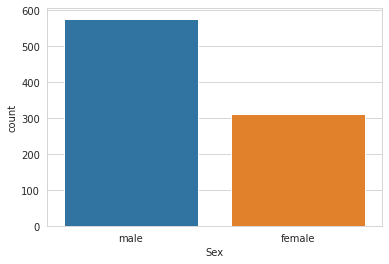

In [23]:

# Comparing number of people according to gender
# 

sns.set_style('whitegrid')
sns.countplot(x='Sex',data=train)
plt.show()

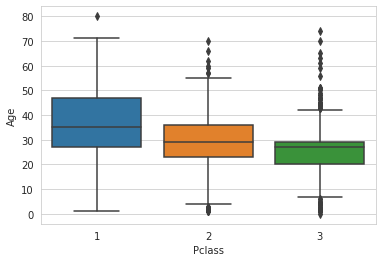

In [24]:
#  Checking for outliers in age according to pc class
# 

sns.boxplot(x='Pclass',y='Age',data=train)
plt.show()

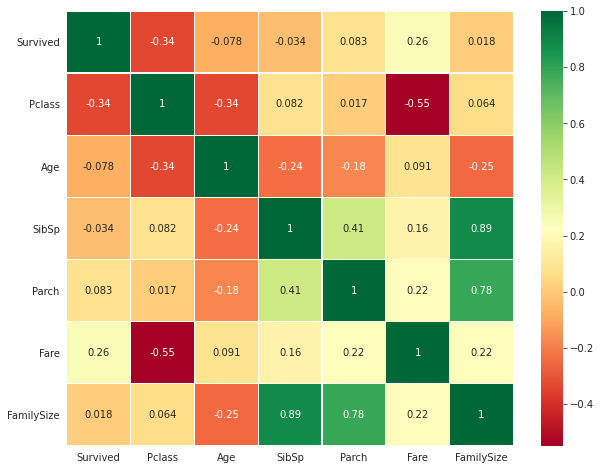

In [25]:
# Correlation 
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## 7. Implementing the Solution

### Part 1 KNN : 80-20 Split

In [26]:
# Previewing the train data set that we will split
# 
train.head(3)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0


In [27]:
# Dropping the name columns
train = train.drop('Name',axis = 1)
test = test.drop('Name',axis = 1)

In [28]:
# Label encoding for our ml model
# Train data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
column = ['Sex','Embarked']
for col_name in column:
       train[col_name] = labelencoder.fit_transform(train[col_name])

In [29]:
# Label encoding for our ml model
# Test data

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
column = ['Sex','Embarked']
for col_name in column:
       test[col_name] = labelencoder.fit_transform(test[col_name])

In [30]:
# Previewing changes
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22,1,0,7.2500,2,1
1,1,1,0,38,1,0,71.2833,0,1
2,1,3,0,26,0,0,7.9250,2,0
3,1,1,0,35,1,0,53.1000,2,1
4,0,3,1,35,0,0,8.0500,2,0


In [31]:

# Preprocessing 
X = train.drop('Survived',axis = 1)
y = train.Survived
print(X.shape)
print(y.shape)

(889, 8)
(889,)


In [32]:
# Performing our 80-20 Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier(n_neighbors=5)
classifier1.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier1.predict(X_test)

In [36]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[94 18]
 [25 41]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       112
           1       0.69      0.62      0.66        66

    accuracy                           0.76       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.75      0.76      0.76       178



### Part 2 KNN : 70-30 Split

In [37]:
# Preprocessing 
A = train.drop('Survived',axis = 1)
b = train.Survived
print(A.shape)
print(b.shape)

(889, 8)
(889,)


In [38]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.30)

In [39]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(A_train)

A_train = scaler.transform(A_train)
A_test = scaler.transform(A_test)

In [40]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors=5)
classifier2.fit(A_train, b_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
# The final step is to make predictions on our test data
# ---
# 
y_pred1 = classifier2.predict(A_test)

In [42]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(b_test, y_pred1))
print(classification_report(b_test, y_pred1))

[[150  17]
 [ 31  69]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       167
           1       0.80      0.69      0.74       100

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



### Part 3 KNN : 60-40 Split

In [43]:
# Preprocessing 
W = train.drop('Survived',axis = 1)
s = train.Survived
print(W.shape)
print(s.shape)

(889, 8)
(889,)


In [44]:
from sklearn.model_selection import train_test_split
W_train, W_test, s_train, s_test = train_test_split(W, s, test_size=0.40)

In [45]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(W_train)

W_train = scaler.transform(W_train)
W_test = scaler.transform(W_test)

In [46]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier3 = KNeighborsClassifier(n_neighbors=5)
classifier3.fit(W_train, s_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
# The final step is to make predictions on our test data
# ---
# 
y_pred2 = classifier3.predict(W_test)

In [48]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(s_test, y_pred2))
print(classification_report(s_test, y_pred2))

[[191  22]
 [ 57  86]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       213
           1       0.80      0.60      0.69       143

    accuracy                           0.78       356
   macro avg       0.78      0.75      0.76       356
weighted avg       0.78      0.78      0.77       356



## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






> Dimensionality Reduction is a machine learning or statistical technique of reducing the amount of random variables in a problem by obtaining a set of principal variables. This process can be carried out using a number of methods that simplify the modeling of complex problems, eliminate redundancy and reduce the possibility of the model overfitting and thereby including results that do not belong.

In [49]:
# Preprocessing 
L = train.drop('Survived',axis = 1)
d = train.Survived
print(L.shape)
print(d.shape)

(889, 8)
(889,)


In [50]:
# The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
L_train, L_test, d_train, d_test = train_test_split(L, d, test_size=0.2, random_state=0)

In [51]:
# # We now need to perform feature scaling. We execute the following code to do so:
# # 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
L_train = sc.fit_transform(L_train)
L_test = sc.transform(L_test)

In [58]:
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
L_train = lda.fit_transform(L_train, d_train)
L_test = lda.transform(L_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 

In [53]:
# We will use the KNN to evaluate the performance of  LDA-reduced algorithms as shown
# 

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(L_train, d_train)
y_pred3 = classifier.predict(L_test)

In [54]:
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(d_test, y_pred3)
print(cm)
print('Accuracy' + str(accuracy_score(d_test, y_pred3)))


[[87 18]
 [29 44]]
Accuracy0.7359550561797753


In [55]:
#Training and Making Predictions Using Random Forest
from sklearn.ensemble import RandomForestClassifier

clrf = RandomForestClassifier(max_depth=2, random_state=0)
clrf.fit(L_train, d_train)
b_pred = clrf.predict(L_test)

In [56]:
#Evaluating the Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(d_test, b_pred))

print('Accuracy' + str (accuracy_score(d_test, b_pred)))

[[91 14]
 [33 40]]
Accuracy0.7359550561797753


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?
> Yes, I believe the data was right.

### b). Do we need other data to answer our question?
> Yes

### c). Did we have the right question?
> Yes.

### Observations
> - After doing several splits the percantages did not change much but it was rather curious what was happening to the confusion matrix data.
- After perfoming LDA the percentages reduced, does that mean the data did not need any dimensionality reduction?